# Trabajo Final de Data Science 2024-2025:

El trabajo consiste en analizar un dataset libremente elegido por cada grupo, que constará de 2 alumnos.

El objetivo es que cada grupo sea capaz de llevar a cabo un análisis riguroso de los datos, así como de exponer y visualizar las conclusiones alcanzadas de forma convincente.

El trabajo puede llevarse a cabo tanto en R como en Python. Se entregará un ZIP file script con el código, datos necesarios y un informe del trabajo.

Se valorará los siguientes apartados:

1. Correcta definición del estudio que se quiere llevar a cabo, estableciendo claramente las preguntas que se pretender analizar en el estudio.

2. Uso adecuado de las distintas técnicas analíticas explicada durante el curso, incluyendo estadística inferencial y contraste de hipótesis, PCA, modelos de regresión lineal, incluyendo regularización, modelos de regresión logística, selección de variables, métodos de clustering.

3. Uso adecuado de técnicas de procesamiento de datos y visualización explicadas durante el curso.

4. Estilo adecuado y profesional en el informe entregado. Puede ser tanto en inglés como en castellano.

5. Presentación oral de los resultados del trabajo.  

Se adjunta un ejemplo de trabajo realizado el curso anterior. No es un trabajo perfecto. Tiene algunos fallos, particularmente se echan en falta un mejor uso de contraste de hipótesis para sustanciar los resultados e hipótesis generadas. Sin embargo, sirve como ejemplo para ver lo que se pide.

Fecha de Entrega: 06/11/2024

Fecha de Presentaciones: 12/11/2024, 15:00

## Datos:
(Jaime)
(explicación del dataset: columnas, tipos de datos, tamaño, fuente de los datos(link)...)

El dataset que se ha usado para este trabajo se ha obtenido de Kaggle. Con un tamaño de 371.03 kB y cuyo link es el siguiente: [https://www.kaggle.com/datasets/valakhorasani/electric-vehicle-charging-patterns](https://www.kaggle.com/datasets/valakhorasani/electric-vehicle-charging-patterns)


Este dataset proporciona un análisis exhaustivo de los patrones de carga de vehículos eléctricos (VE) y el comportamiento de los usuarios. Contiene 1,320 muestras de datos de sesiones de carga, incluyendo métricas como el consumo de energía, la duración de la carga y los detalles del vehículo. Cada entrada captura varios aspectos del uso de VE (20 columnas), permitiendo un análisis profundo y modelado predictivo.

Características Clave:

* ID de Usuario (**User ID**): Identificador único para cada usuario.
    - String

* Modelo del Vehículo (**Vehicle Model**): Modelo del vehículo eléctrico que se está cargando (por ejemplo, Tesla Model 3, Nissan Leaf). 
    - String

* Capacidad de Batería [kWh] (**Battery Capacity [kWh]**): Capacidad total de la batería del vehículo en kilovatios-hora. 
    - Float64

* ID de la Estación de Carga (**Charging Station ID**): Identificador único para la estación de carga utilizada.
    - String

* Ubicación de la Estación de Carga (**Charging Station Location**): Ubicación geográfica de la estación de carga (por ejemplo, Nueva York, Los Ángeles).
    - String

* Hora de Inicio de la Carga (**Charging Start Time**): Marca temporal que indica cuándo comenzó la sesión de carga.
    - String

* Hora de Fin de la Carga (**Charging End Time**) : Marca temporal que indica cuándo terminó la sesión de carga.
    - String

* Energía Consumida [kWh] (**Energy Consumed [kWh]**): Energía total consumida durante la sesión de carga, medida en kilovatios-hora.
    - Float64

* Duración de la Carga [horas] (**Charging Duration [hours]**): Tiempo total empleado para cargar el vehículo, medido en horas.
    - Float64

* Tasa de Carga [kW] (**Charging Rate [kW]**): Tasa promedio de entrega de energía durante la sesión de carga, medida en kilovatios.
    - Float64

* Costo de Carga [USD] (**Charging Cost [USD]**): Costo total incurrido por la sesión de carga, medido en dólares estadounidenses.
    - Float64

* Hora del Día (**Time of Day**): Segmento temporal cuando ocurrió la carga (por ejemplo, Mañana, Tarde).
    - String

* Día de la Semana (**Day of Week**): Día de la semana en que ocurrió la carga (por ejemplo, Lunes, Martes).
    - String

* Estado de Carga (Inicio %) (**State of Charge (Start %)**): Porcentaje de carga de la batería al inicio de la sesión de carga.
    - Float64

* Estado de Carga (Fin %) (**State of Charge (End %)**): Porcentaje de carga de la batería al final de la sesión de carga.
    - Float64

* Distancia Recorrida (desde la última carga) (km) (**Distance Driven (since last charge)(km)**): Distancia recorrida desde la última sesión de carga medida en kilómetros.
    - Float64

* Temperatura [°C] (**Temperature [°C]**): Temperatura ambiente durante la sesión de carga, medida en grados Celsius.
    - Float64

* Antigüedad del Vehículo [años] (**Vehicle Age [years]**): Edad del vehículo eléctrico, medida en años.
    - Float64

* Tipo de Cargador (**Charger Type**): Tipo de cargador utilizado (por ejemplo, Nivel 1, Nivel 2, Cargador Rápido DC).
    - String

* Tipo de Usuario (**User Type**): Clasificación del usuario según sus hábitos de conducción (por ejemplo, Commuter, Viajero de Larga Distancia).
    - String



## Metodología:

- Análisis del problema ¿Qué queremos?
- Visualización de los datos en crudo.
- Procesado de los datos.
- Representación de los datos y sus relaciones. (EDA)
- Contraste de hipotesis (Luis).
- Todo el tema de estadistica y machine learning.


# Importaciones para el proyecto:

In [25]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt



# Cargar los datos:

In [19]:
raw_data = pd.read_csv('DatasetDS/ev_charging_patterns.csv')
print(raw_data.head(5))
print(raw_data.describe())
print(f"Columnas numericas = {raw_data.describe().columns}")

  User ID Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
0  User_1        BMW i3              108.463007         Station_391   
1  User_2  Hyundai Kona              100.000000         Station_428   
2  User_3    Chevy Bolt               75.000000         Station_181   
3  User_4  Hyundai Kona               50.000000         Station_327   
4  User_5  Hyundai Kona               50.000000         Station_108   

  Charging Station Location  Charging Start Time    Charging End Time  \
0                   Houston  2024-01-01 00:00:00  2024-01-01 00:39:00   
1             San Francisco  2024-01-01 01:00:00  2024-01-01 03:01:00   
2             San Francisco  2024-01-01 02:00:00  2024-01-01 04:48:00   
3                   Houston  2024-01-01 03:00:00  2024-01-01 06:42:00   
4               Los Angeles  2024-01-01 04:00:00  2024-01-01 05:46:00   

   Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
0              60.712346                   0.591363        

Como se puede ver en el resultado de .describe, en algunas columnas faltan datos. Estas columnas son "Energy Consumed (kWh)", "Charging Rate (kW)","Distance Driven (since last charge) (km)". De las cuales faltan exáctamente 66 datos en cada una de las columnas, de forma aleatoria, es decir, no coinciden las filas con las columnas de los otros datos que faltan.

Para solucionar el tema de los datos faltantes rellenaremos dichos campos con la mediana.

Además aplicaremos un redondeo a algunas de las columnas, porque hay en dichas columnas muchos datos enteros y algún que otro dato con muchos decimales. Lo que significa que lo sdatos enteros han sido introducidos sin ser estas medidas precisas.

In [41]:
for column in ['Battery Capacity (kWh)', 'Energy Consumed (kWh)',
               'Charging Duration (hours)', 'Charging Rate (kW)',
               'Charging Cost (USD)', 'State of Charge (Start %)',
               'State of Charge (End %)', 'Distance Driven (since last charge) (km)',
               'Temperature (°C)', 'Vehicle Age (years)']:
    raw_data[column].fillna(raw_data[column].median(), inplace=True)

# Verificación para comprobar que no hay NaN values
print(raw_data.isna().sum())

# Redondear valores de Battery Capacity (kWh) y Vehicle Age (years) a 0 decimales
raw_data['Battery Capacity (kWh)'] = raw_data['Battery Capacity (kWh)'].round(0)
raw_data['Vehicle Age (years)'] = raw_data['Vehicle Age (years)'].round(0)

# Verifica los cambios en las columnas
print(raw_data[['Battery Capacity (kWh)', 'Vehicle Age (years)']].head())

# Crear la columna 'Percentage of Charge' y eliminar columnas
raw_data['Percentage of Charge'] = raw_data['State of Charge (End %)'] - raw_data['State of Charge (Start %)']
data_cleaned = raw_data.drop(columns=['User ID', 'Charging Station ID', 'Charging Start Time', 'Charging End Time', 'State of Charge (Start %)', 'State of Charge (End %)'])

# Mostrar el DataFrame resultante
data_cleaned


User ID                                     0
Vehicle Model                               0
Battery Capacity (kWh)                      0
Charging Station ID                         0
Charging Station Location                   0
Charging Start Time                         0
Charging End Time                           0
Energy Consumed (kWh)                       0
Charging Duration (hours)                   0
Charging Rate (kW)                          0
Charging Cost (USD)                         0
Time of Day                                 0
Day of Week                                 0
State of Charge (Start %)                   0
State of Charge (End %)                     0
Distance Driven (since last charge) (km)    0
Temperature (°C)                            0
Vehicle Age (years)                         0
Charger Type                                0
User Type                                   0
Percentage of Charge                        0
dtype: int64
   Battery Capacity (

/var/folders/0f/x_tx7rbx6ss_pm165nny66fh0000gn/T/ipykernel_43409/2564167881.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data[column].fillna(raw_data[column].median(), inplace=True)


,Vehicle Model,Battery Capacity (kWh),Charging Station Location,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,Percentage of Charge
0,BMW i3,108.0,Houston,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,293.602111,27.947953,2.0,DC Fast Charger,Commuter,56.748386
1,Hyundai Kona,100.0,San Francisco,12.339275,3.133652,30.677735,21.128448,Morning,Monday,112.112804,14.311026,3.0,Level 1,Casual Driver,74.548566
2,Chevy Bolt,75.0,San Francisco,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,71.799253,21.002002,2.0,Level 2,Commuter,63.063011
3,Hyundai Kona,50.0,Houston,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler,16.504325
4,Hyundai Kona,50.0,Los Angeles,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler,9.484836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,Nissan Leaf,100.0,New York,42.011654,1.426444,5.895475,22.081164,Evening,Sunday,239.601075,1.919655,7.0,DC Fast Charger,Commuter,44.711850
1316,BMW i3,100.0,New York,68.185853,3.238212,18.388012,5.067806,Evening,Tuesday,164.376022,34.029775,4.0,Level 2,Casual Driver,61.640087
1317,Nissan Leaf,100.0,New York,18.895102,3.267122,45.482066,37.255002,Evening,Tuesday,226.519258,20.358761,5.0,DC Fast Charger,Commuter,6.775798
1318,Chevy Bolt,85.0,San Francisco,13.756252,2.754527,38.148183,39.046146,Afternoon,Sunday,291.494076,24.134598,5.0,Level 2,Commuter,-10.261424


In [42]:
data_cleaned.describe()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Percentage of Charge
count,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,74.535606,42.645320,2.269377,25.945043,22.551352,153.529942,15.263591,3.616667,26.011578
std,20.624561,21.843794,1.061037,13.656504,10.751494,83.826126,14.831216,2.313233,29.814729
min,2.000000,0.045772,0.095314,1.472549,0.234317,0.862361,-10.724770,0.000000,-84.360948
25%,62.000000,24.868084,1.397623,14.431294,13.368141,81.931571,2.800664,2.000000,4.808443
50%,75.000000,42.691405,2.258136,25.603799,22.076360,152.259867,14.630846,4.000000,24.996490
75%,85.000000,60.545496,3.112806,36.955838,31.646044,221.962330,27.981810,6.000000,47.721784
max,193.000000,152.238758,7.635145,97.342255,69.407743,398.364775,73.169588,12.000000,127.463125


Echando un ojo a los datos hay algo que se sale fuera de lo normal. Un coche eléctrico no puede tener una capacidad de carga de un valor menor de 30. Por lo tanto hay unos cuantos outliers que hay que estudiar en este dataset. Peor además la capacidad de la batería debería ser similar entre modelos, o estar discretizada en unos pocos valores por marca. Y lo que nos encontramos son muchos valores diferentes por cada marca.

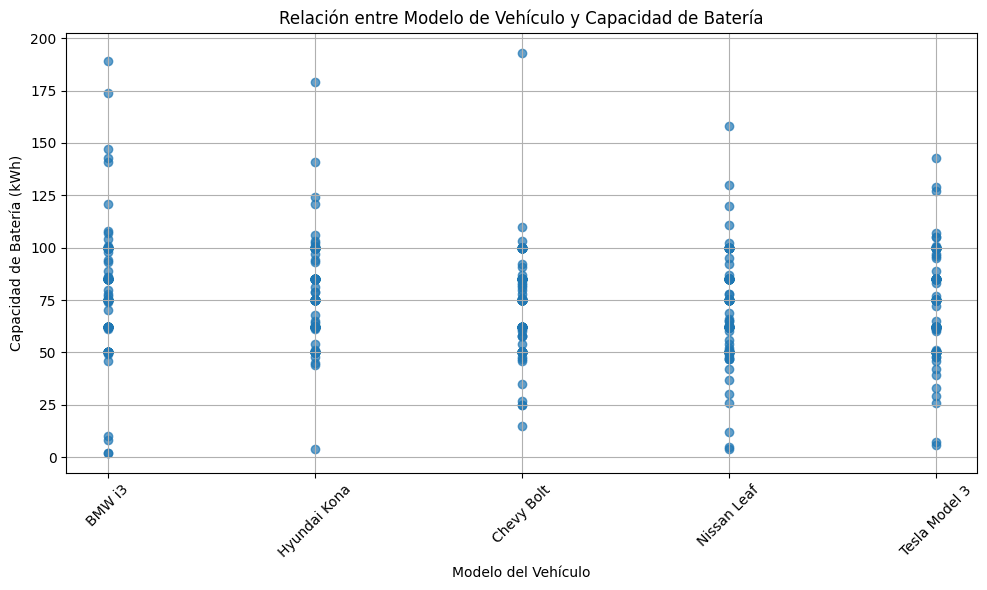

In [43]:
# Generar un scatter plot de Vehicle Model vs Battery Capacity (kWh)
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['Vehicle Model'], data_cleaned['Battery Capacity (kWh)'], alpha=0.7)
plt.title('Relación entre Modelo de Vehículo y Capacidad de Batería')
plt.xlabel('Modelo del Vehículo')
plt.ylabel('Capacidad de Batería (kWh)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

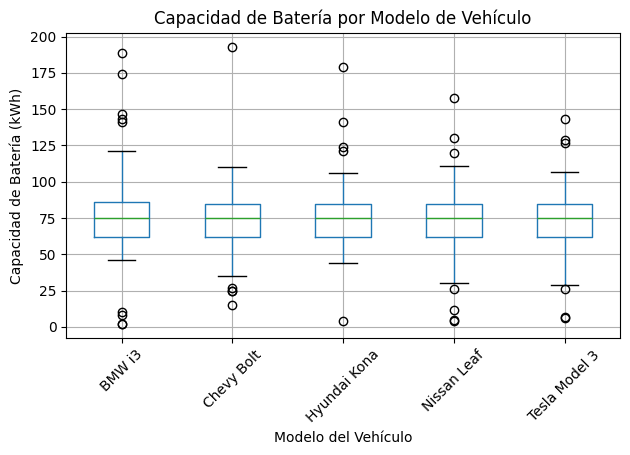

In [44]:
plt.figure(figsize=(10, 6))
data_cleaned.boxplot(column='Battery Capacity (kWh)', by='Vehicle Model', grid=True)
plt.title("Capacidad de Batería por Modelo de Vehículo")
plt.suptitle("")  # Elimina el título automático de pandas
plt.xlabel("Modelo del Vehículo")
plt.ylabel("Capacidad de Batería (kWh)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

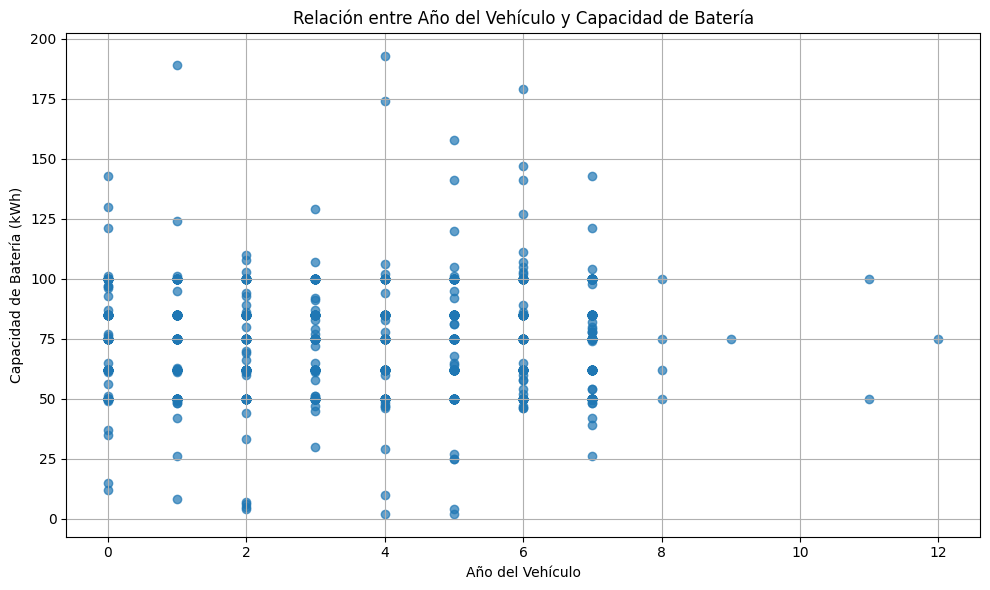

In [48]:
# Generar un scatter plot de Vehicle Model vs Battery Capacity (kWh)
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['Vehicle Age (years)'], data_cleaned['Battery Capacity (kWh)'], alpha=0.7)
plt.title('Relación entre Año del Vehículo y Capacidad de Batería')
plt.xlabel('Año del Vehículo')
plt.ylabel('Capacidad de Batería (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

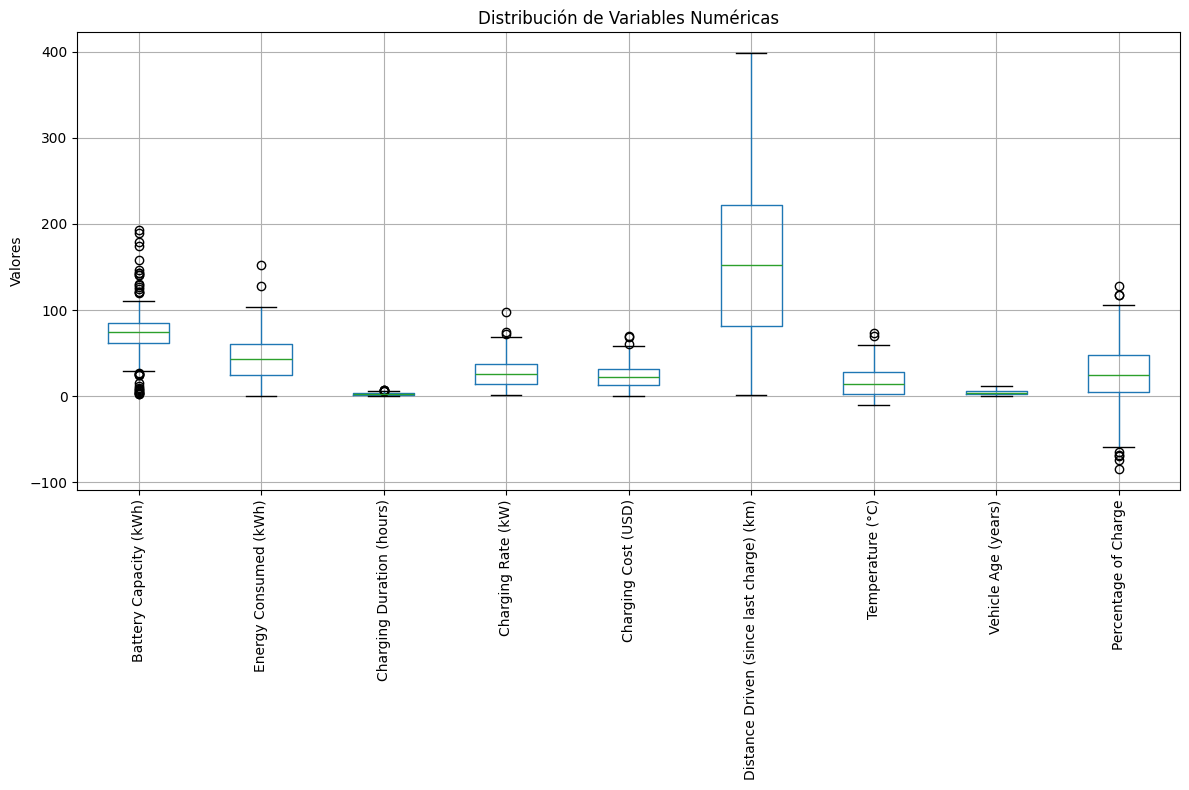

In [45]:
numeric_columns = data_cleaned.describe().columns  # Seleccionar las columnas numéricas a partir de describe()

# Generar el gráfico de boxplot
plt.figure(figsize=(12, 8))
data_cleaned[numeric_columns].boxplot()
plt.title("Distribución de Variables Numéricas")
plt.xticks(rotation=90)
plt.ylabel("Valores")
plt.grid(True)
plt.tight_layout()
plt.show()

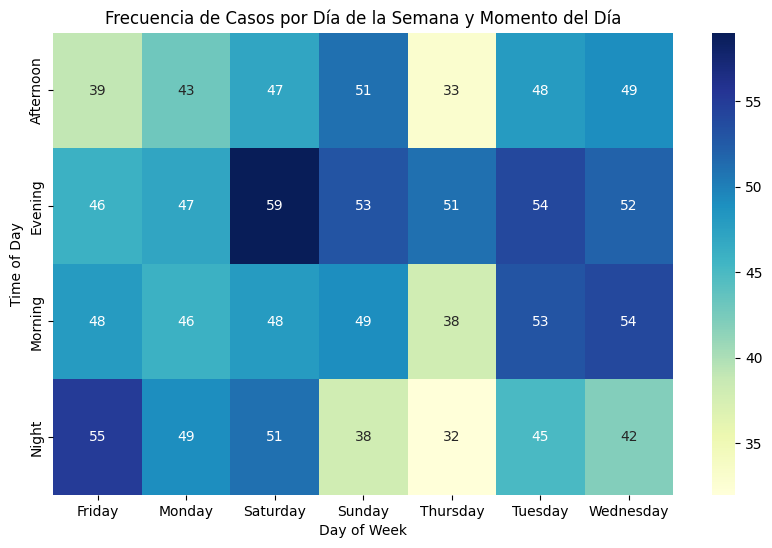

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupamos los datos y contamos las ocurrencias para cada combinación de día y momento del día
heatmap_data = data_cleaned.groupby(['Time of Day', 'Day of Week']).size().unstack(fill_value=0)

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

# Configurar los ejes y el título
plt.xlabel("Day of Week")
plt.ylabel("Time of Day")
plt.title("Frecuencia de Casos por Día de la Semana y Momento del Día")
plt.show()

/var/folders/0f/x_tx7rbx6ss_pm165nny66fh0000gn/T/ipykernel_43409/1779060944.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = data_cleaned.groupby(['Time of Day', 'Day of Week']).size().unstack(fill_value=0)


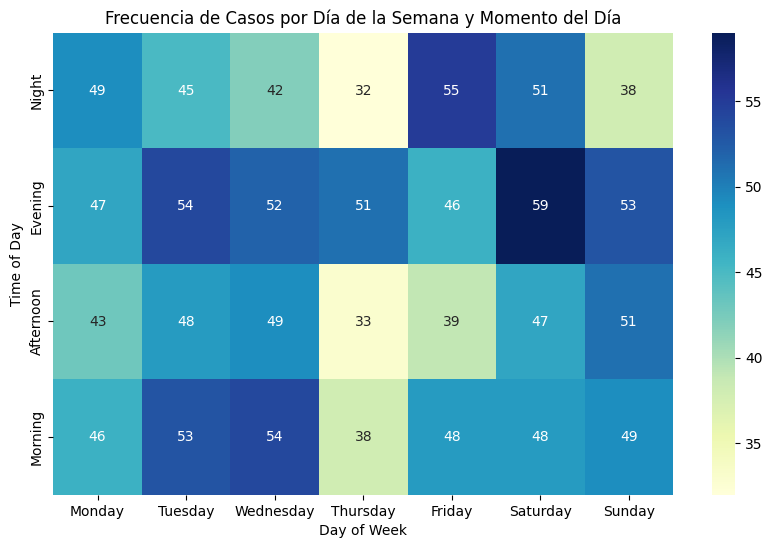

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype


# Definir el orden deseado de los días de la semana
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_type = CategoricalDtype(categories=days_order, ordered=True)
data_cleaned['Day of Week'] = data_cleaned['Day of Week'].astype(day_type)

# Si necesitas un orden específico para 'Time of Day', puedes definirlo también
time_order = ["Night", "Evening", "Afternoon", "Morning"]
time_type = CategoricalDtype(categories=time_order, ordered=True)
data_cleaned['Time of Day'] = data_cleaned['Time of Day'].astype(time_type)

# Agrupar los datos y contar las ocurrencias para cada combinación de día y momento del día
heatmap_data = data_cleaned.groupby(['Time of Day', 'Day of Week']).size().unstack(fill_value=0)

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

# Configurar los ejes y el título
plt.xlabel("Day of Week")
plt.ylabel("Time of Day")
plt.title("Frecuencia de Casos por Día de la Semana y Momento del Día")
plt.show()


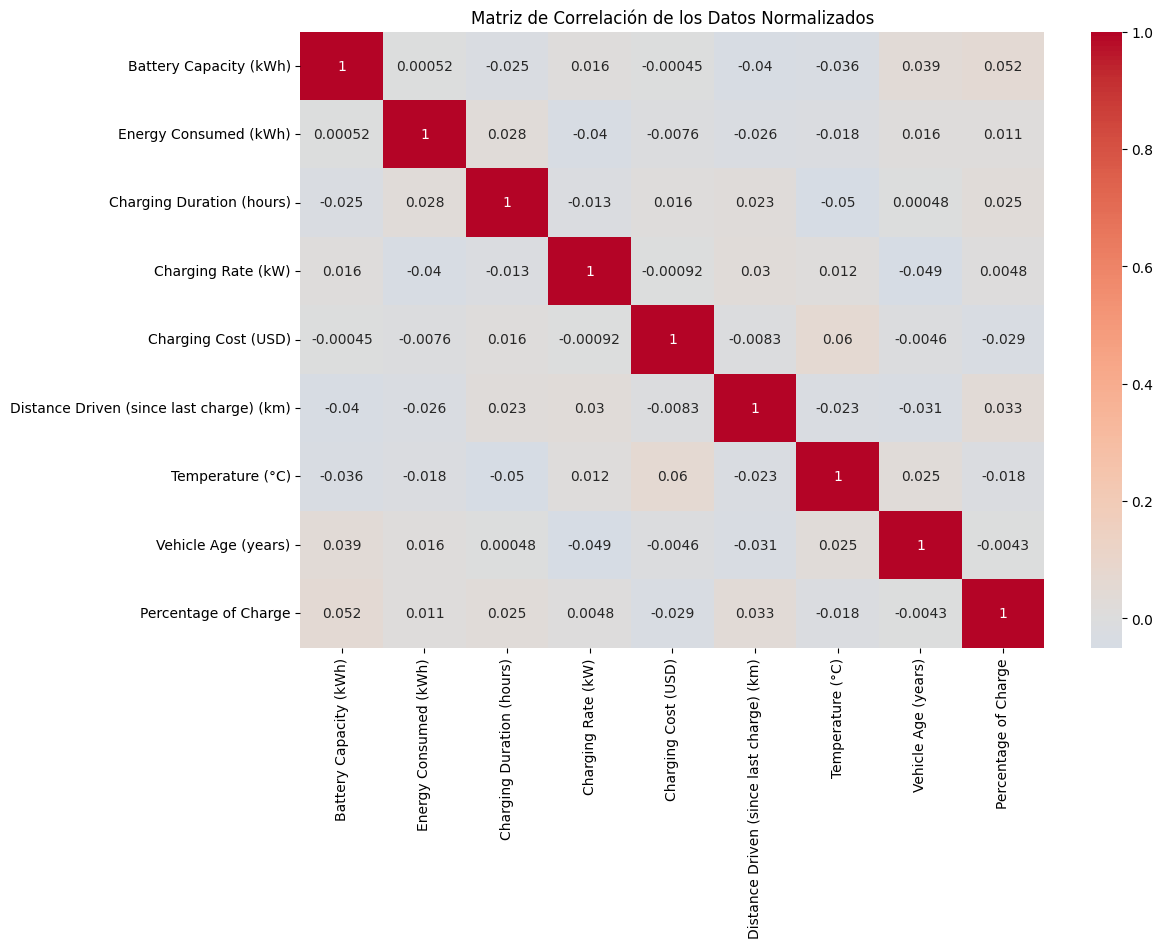

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Filtrar solo las columnas numéricas
numerical_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Normalizar los datos (usando StandardScaler para estandarización)
scaler = StandardScaler()
numerical_data_normalized = scaler.fit_transform(numerical_data)

# Crear un DataFrame de los datos normalizados, usando los mismos nombres de columnas
numerical_data_normalized = pd.DataFrame(numerical_data_normalized, columns=numerical_data.columns)

# Calcular la matriz de correlación
correlation_matrix = numerical_data_normalized.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación de los Datos Normalizados")
plt.show()


# Anotaciones del trabajo:

tenemos 1320 filas y 20 columnas

* Columnas a borrar en el dataset:
    - User ID
    - Charging Start Time
    - Charging End Time



Preguntas:

- ¿Cuáles son las principales variables que influyen en el tiempo total de carga?


Gráficas sencillas:

- Picos de carga agrupados en momento de día y día: 7*4= 28 momentos
- Matriz de relaciones que influye más en la duración de la carga o en el coste. (solo datos numericos).

Preguntas sacadas de internet (Jaime):

* Análisis de comportamiento de carga:

¿Cuál es la variación del tiempo de carga en función de diferentes horas del día o días de la semana?
¿Existe una relación entre el tiempo de carga y la tarifa de energía en distintas estaciones o franjas horarias?
¿Se observan patrones estacionales en el uso de estaciones de carga (por ejemplo, diferencias entre invierno y verano)?

* Segmentación de usuarios y patrones de uso:

¿Existen diferentes perfiles de usuarios (según tiempo medio de carga, frecuencia de uso, etc.) y cómo varían sus comportamientos?
¿Qué diferencias existen en los patrones de carga entre usuarios particulares y comerciales, si el dataset contiene esta información?
¿Qué factores parecen influir más en la elección de una estación de carga específica?

* Predicción y optimización:

¿Qué variables tienen el mayor impacto en la duración del tiempo de carga y en la frecuencia de uso de las estaciones?
¿Es posible predecir las horas pico de uso en función de los datos históricos?
¿Qué características del punto de carga (como potencia, ubicación) predicen un mayor número de usuarios?

* Impacto en la infraestructura de carga:

¿Cuáles son los puntos de carga con mayor uso, y qué características tienen en común?
¿Cómo varía la demanda de carga según la proximidad a áreas urbanas o rurales?
¿Existen patrones de uso que sugieren la necesidad de ampliar la infraestructura en ciertas áreas?

* Sostenibilidad y Eficiencia Energética:

¿Cuánto tiempo, en promedio, permanecen los vehículos conectados después de estar completamente cargados?
¿Cuál es la tasa de eficiencia en el uso de las estaciones de carga? ¿Se producen períodos significativos de inactividad?
¿Cómo afecta el tiempo de conexión a la eficiencia de la infraestructura de carga en general?

* Tendencias de adopción de EV:

¿Se observa un crecimiento en la cantidad de sesiones de carga a lo largo del tiempo? ¿Es consistente en todas las estaciones?
¿Qué patrones emergentes indican un aumento en la adopción de vehículos eléctricos en ciertas áreas o tipos de usuarios?

Posibles Preguntas de Análisis (Luis)
* Patrones de Consumo y Eficiencia:
-¿Cuál es la relación entre el Estado de Carga al inicio y final y la Energía Consumida?
-¿Cómo varía el Costo de Carga en función del Ubicación de la Estación o el Tipo de Cargador?

* Factores que Afectan la Duración y Costo de la Carga:
¿Cómo influyen el Modelo de Vehículo, la Capacidad de Batería y la Edad del Vehículo en el Costo de Carga y el Tiempo de Carga?
¿Qué impacto tiene la Temperatura en la Duración de Carga y Eficiencia?

* Análisis de Uso del Cargador por Tipo de Usuario:
¿Qué diferencias existen entre los patrones de carga de los usuarios clasificados como Commuters frente a los Long-Distance Travelers?
¿Existe una tendencia en el Horario de Carga según el Tipo de Usuario?

* Análisis de Localización y Estaciones de Carga:
¿Cuáles son los lugares con mayor consumo de energía, y cómo varía el Tiempo de Carga entre distintas Ubicaciones?
¿Se identifican patrones de alta demanda según el Día de la Semana o la Hora del Día?


In [2]:
#dcfgvhbjnmkl,odgpgjuhvudbwnq
